# Q1: Predict delivery time using sorting time 

In [156]:
import pandas as pd
data = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/4 Simple Linear Regression/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Rename the columns

In [158]:
data2= data.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)

In [159]:
data2.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Duplicates

In [160]:
data2[data2.duplicated()].shape

(0, 2)

In [161]:
data2[data2.duplicated()]

,Delivery_Time,Sorting_Time


 No Duplicate  data found

### outlier Detection

<AxesSubplot:>

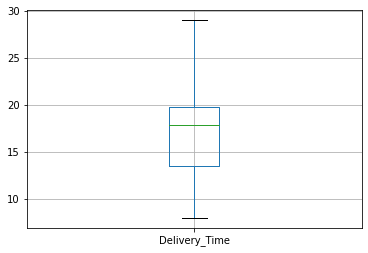

In [162]:
data2.boxplot(column=['Delivery_Time'])

<AxesSubplot:>

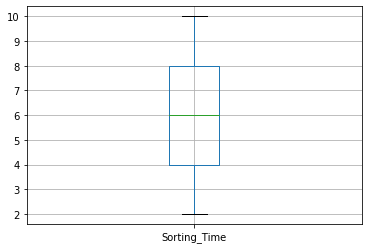

In [163]:
data2.boxplot(column=['Sorting_Time'])

No Outlierd detected

### Correlation

In [164]:
data2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\DELL 5459\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

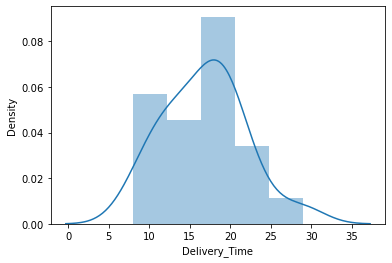

In [165]:
import seaborn as sns
sns.distplot(data2['Delivery_Time'])

C:\Users\DELL 5459\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

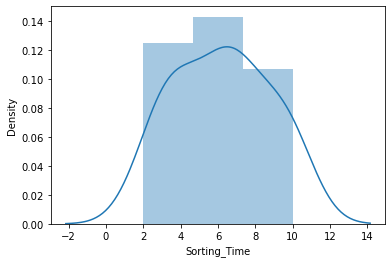

In [166]:
sns.distplot(data2['Sorting_Time'])

### Fitting a Linear regression Model

In [167]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time ~ Sorting_Time',data = data2).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

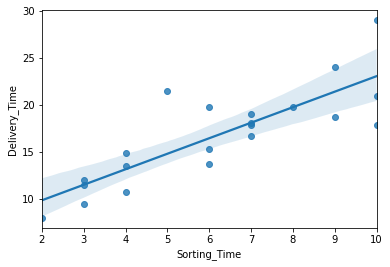

In [168]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=data2)

In [169]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [170]:
# t-values and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [171]:
# R squared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Predict new data point

In [172]:
# Predict for 15, 20 sorting Time
newdata= pd.Series([40, 50])
newdata

0    40
1    50
dtype: int64

In [173]:
data_pred= pd.DataFrame(newdata, columns=['Sorting_Time'])

In [174]:
model.predict(data_pred)

0    72.543530
1    89.033729
dtype: float64

# Q2: Build a prediction model for Salary_hike

In [175]:
data3= pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/4 Simple Linear Regression/Salary_Data.csv')
data3.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [176]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [177]:
#No NaN values are there in dataset

### Duplicates

In [178]:
data3[data3.duplicated()]

,YearsExperience,Salary


No Duplicated data found

### Outlier Detection

<AxesSubplot:>

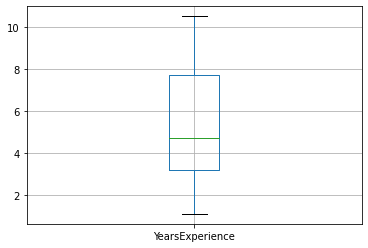

In [179]:
# Box Plot
data3.boxplot(column=['YearsExperience'])

<AxesSubplot:>

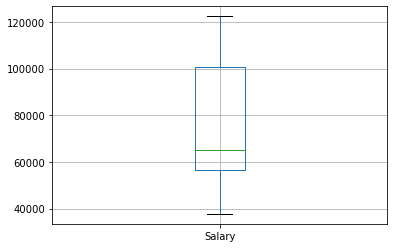

In [180]:
data3.boxplot(column='Salary')

No outliers detected

### Correlation

In [181]:
data3.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\DELL 5459\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

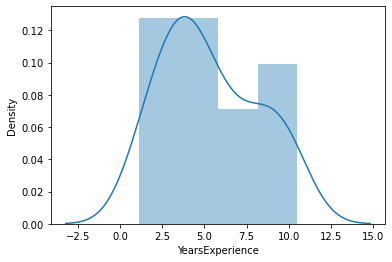

In [182]:
sns.distplot(data3['YearsExperience'])

C:\Users\DELL 5459\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

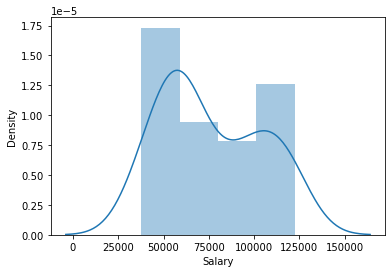

In [183]:
sns.distplot(data3['Salary'])

## Fitting a Linear Regression Model

In [184]:
model = smf.ols('Salary~YearsExperience', data=data3).fit()

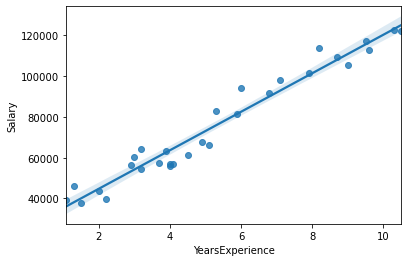

In [185]:
sns.regplot(x='YearsExperience', y='Salary', data= data3);

In [186]:
# Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [187]:
# t- value and p-value
print(model.tvalues,'\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [188]:
# R sqaured values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

This is an excellent model

### Predict for new data points

In [189]:
# Predict salary for 12 and 15 years of experience
newdata2= pd.Series([12,15])

In [190]:
data_pred_Salary= pd.DataFrame(newdata2, columns=['YearsExperience'])

In [193]:
model.predict(data_pred_Salary)

0    139191.748056
1    167541.635020
dtype: float64